In [1]:
#Import all the required Libraties
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

1. Defining Problem Statement and
Analysing basic metrics.
We will now analyse the data and generate insights that could help Netflix in deciding which
type of shows/movies to produce and how they can grow the business in different countries
and best week to release tv-shows and movie. and find the best month to release tv-show and
movie.


In [3]:

#Read CSV File
df=pd.read_csv('Netflix.csv')

2. Observations on the shape of data, data
types of all the attributes, conversion of
categorical attributes to 'category' (If
required), missing value detection, statistical
summary.

In [4]:
#shape of data
df.shape

(8807, 12)

In [5]:
# Data type of all the attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
#Missing Value Count
for col in df.columns:
    print("Missing value count in "+col+" :- "+str(len(df[pd.isna(df[col])])))

Missing value count in show_id :- 0
Missing value count in type :- 0
Missing value count in title :- 0
Missing value count in director :- 2634
Missing value count in cast :- 825
Missing value count in country :- 831
Missing value count in date_added :- 10
Missing value count in release_year :- 0
Missing value count in rating :- 4
Missing value count in duration :- 3
Missing value count in listed_in :- 0
Missing value count in description :- 0


In [19]:
#statistical summary 
df.describe() 

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:

#statistical summary of object
df.describe(include=object) 

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [58]:
#Replace Missing Values
df["director"] = df["director"].fillna("Other_director")
df["country"] = df["country"].fillna("Other_Country")
df["cast"] = df["cast"].fillna("other_cast")
df["release_year"] = df["release_year"].fillna(0)


In [60]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Week,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,other_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
1,s2,TV Show,Blood & Water,Other_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Other_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,9.0
3,s4,TV Show,Jailbirds New Orleans,Other_director,other_cast,Other_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,9.0
4,s5,TV Show,Kota Factory,Other_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,9.0


In [63]:
small_df = df[['listed_in','country','director']]
small_df.head(5)

,listed_in,country,director
0,Documentaries,United States,Kirsten Johnson
1,"International TV Shows, TV Dramas, TV Mysteries",South Africa,Other_director
2,"Crime TV Shows, International TV Shows, TV Act...",Other_Country,Julien Leclercq
3,"Docuseries, Reality TV",Other_Country,Other_director
4,"International TV Shows, Romantic TV Shows, TV ...",India,Other_director


In [67]:
small_df['listed_in'] = small_df['listed_in'].apply(lambda x: str(x).split(', '))
small_df = small_df.explode('listed_in')
small_df.head(20)

,listed_in,country,director
0,Documentaries,United States,Kirsten Johnson
1,International TV Shows,South Africa,Other_director
1,TV Dramas,South Africa,Other_director
1,TV Mysteries,South Africa,Other_director
2,Crime TV Shows,Other_Country,Julien Leclercq
2,International TV Shows,Other_Country,Julien Leclercq
2,TV Action & Adventure,Other_Country,Julien Leclercq
3,Docuseries,Other_Country,Other_director
3,Reality TV,Other_Country,Other_director
4,International TV Shows,India,Other_director


3. Non-Graphical Analysis: Value counts and
unique attributes

In [69]:
# value counts of show_id
len(df["show_id"].value_counts())

8807

In [70]:
# Unique count of show_id
df["show_id"].nunique() 

8807

In [71]:
# value counts of Type
df["type"].value_counts() 

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [73]:
# Unique count of Type
print(df["type"].nunique())

2


In [74]:
# value counts of title
df["title"].value_counts() 

title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                      ..
Bangkok Breaking                       1
Vendetta: Truth, Lies and The Mafia    1
The Starling                           1
The Great British Baking Show          1
Sankofa                                1
Name: count, Length: 8807, dtype: int64

In [75]:
# Unique count of title
df["title"].nunique() 

8807

In [76]:
# value counts of director
df["director"].value_counts() 

director
Other_director                            2634
Rajiv Chilaka                               19
RaÃºl Campos, Jan Suter                     18
Suhas Kadav                                 16
Marcus Raboy                                16
                                          ... 
Milla Harrison-Hansley, Alicky Sussman       1
Drew Stone                                   1
Benjamin Turner                              1
S. Shankar                                   1
Peter Hewitt                                 1
Name: count, Length: 4529, dtype: int64

In [77]:
# value counts of cast
df["cast"].value_counts() 

cast
other_cast                                                                                                                                                      825
David Attenborough                                                                                                                                               19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                          14
Samuel West                                                                                                                                                      10
Jeff Dunham                                                                                                                                                       7
                                                                                                                                                               ... 
Ali Suliman

In [78]:
# Unique count of cast
df["cast"].nunique() 

7693

In [93]:
# value counts of country
df["country"].value_counts() 

country
United States                                             2818
India                                                      972
Other_Country                                              831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

In [95]:
# value counts of date_added
df["date_added"].value_counts() 

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2019-06-23      1
2019-09-11      1
2015-05-17      1
2021-09-20      1
2021-09-25      1
Name: count, Length: 1714, dtype: int64

In [96]:
# Unique count of date_added
df["date_added"].nunique() 

1714

In [97]:
# value counts of release_year
df["release_year"].value_counts() 

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

In [98]:
# Unique count of release_year
df["release_year"].nunique() 

74

In [99]:
# value counts of duration
df["duration"].value_counts() 

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
228 min         1
18 min          1
205 min         1
201 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [100]:
# value counts of listed_in
df["listed_in"].value_counts() 

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64

In [101]:
# Unique count of listed_in
df["listed_in"].nunique() 

514

In [102]:
# value counts of description
df["description"].value_counts() 

description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.     4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                  3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.      3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.     3
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests thereâ€™s more to the mystery than meets the eye.    2
                                                                                                                                                             ..
A gifted young ballet dancer

In [103]:
# Unique count of description
df["description"].nunique() 

8775

#### 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

##### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

##### 4.2 For categorical variable(s): Boxplot

##### 4.3 For correlation: Heatmaps, Pairplots


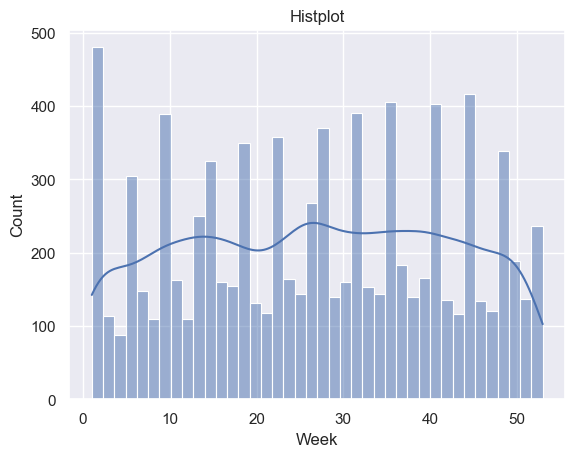

In [118]:
sns.set_theme()
sns.histplot(df['Week'], bins=40, kde=True)  # kde=True adds the density curve like distplot did
plt.title("Histplot")
plt.show()


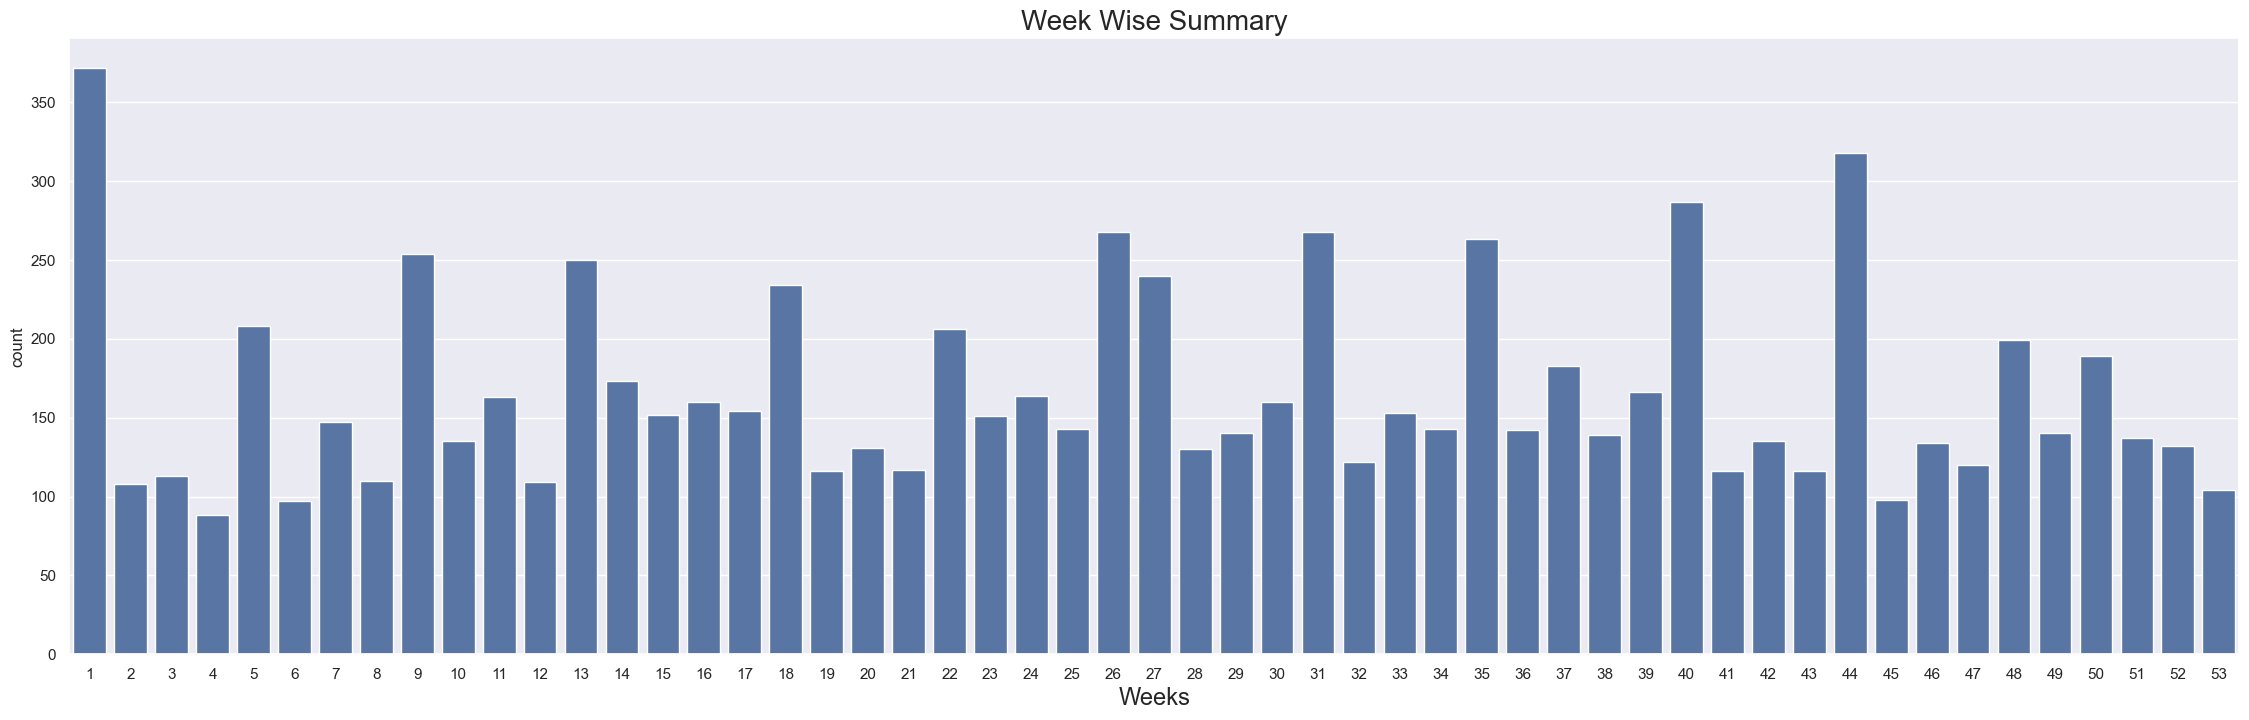

In [124]:
plt.figure(figsize=(28,8))
sns.set_theme()
sns.countplot(x='Week',data=df)
plt.title("Week Wise Summary",fontsize=20)
plt.xlabel("Weeks",fontsize=17)
plt.show()

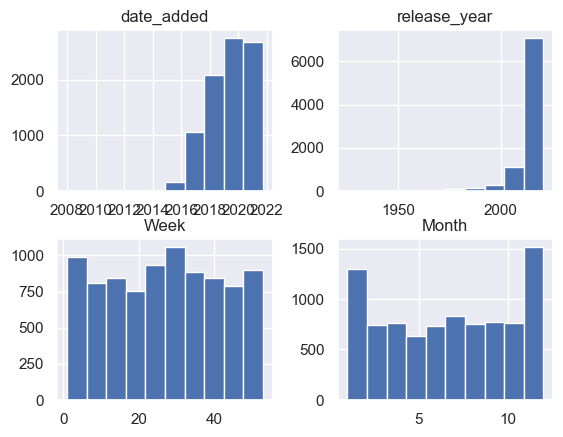

In [125]:
df.hist()
plt.show()

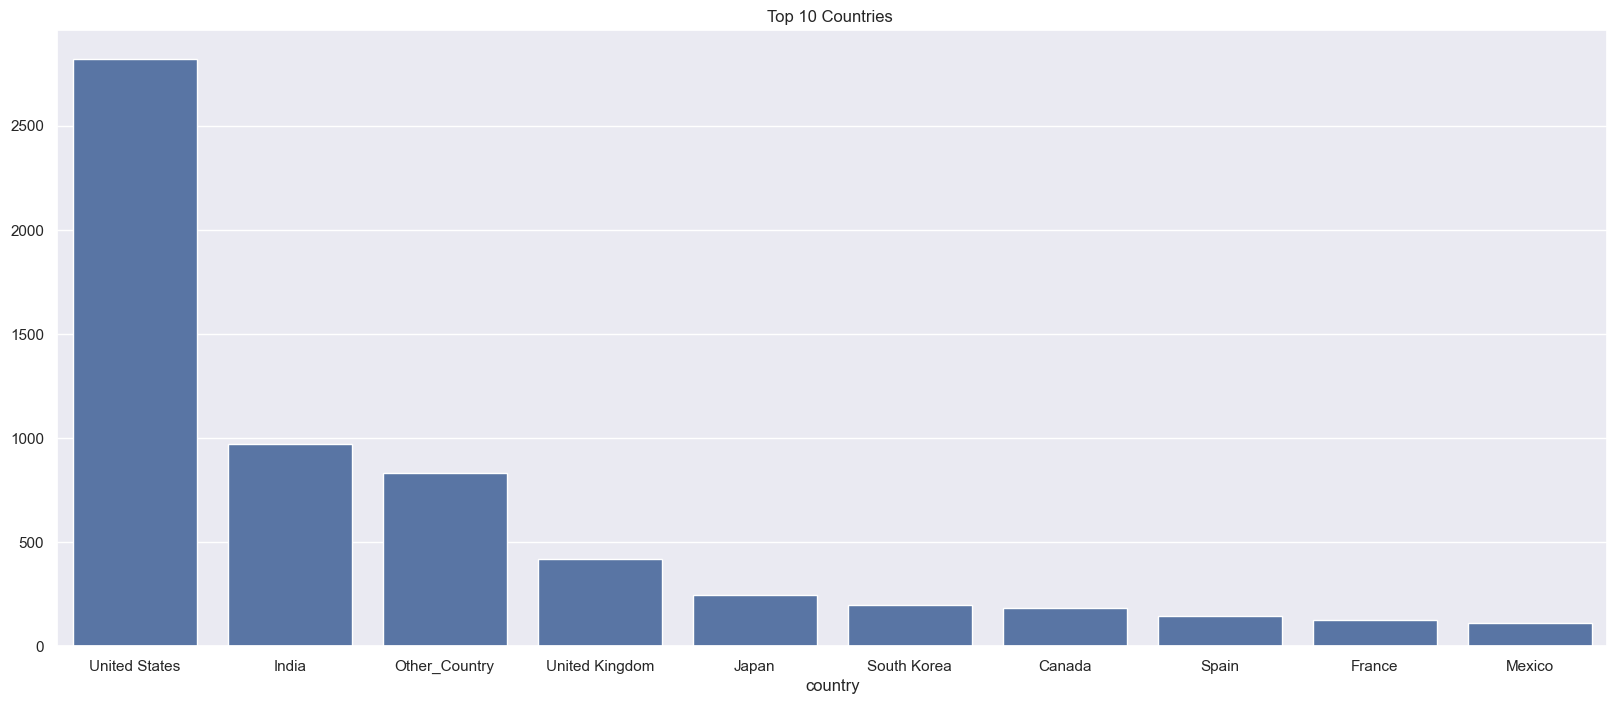

In [135]:
# Top 10 Countries
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(20, 8))
bar_plot = sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries ')
plt.show()


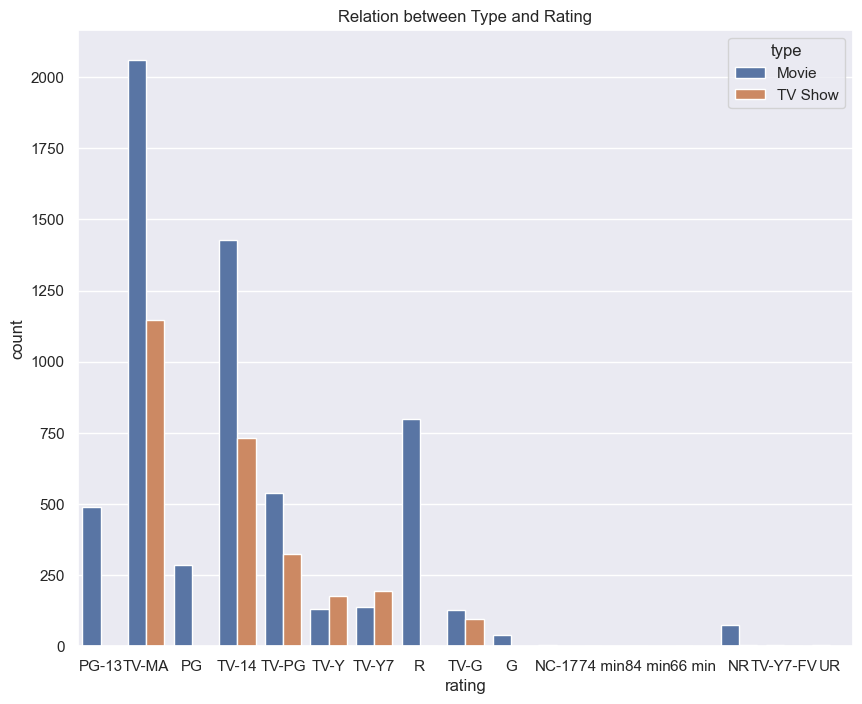

In [136]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

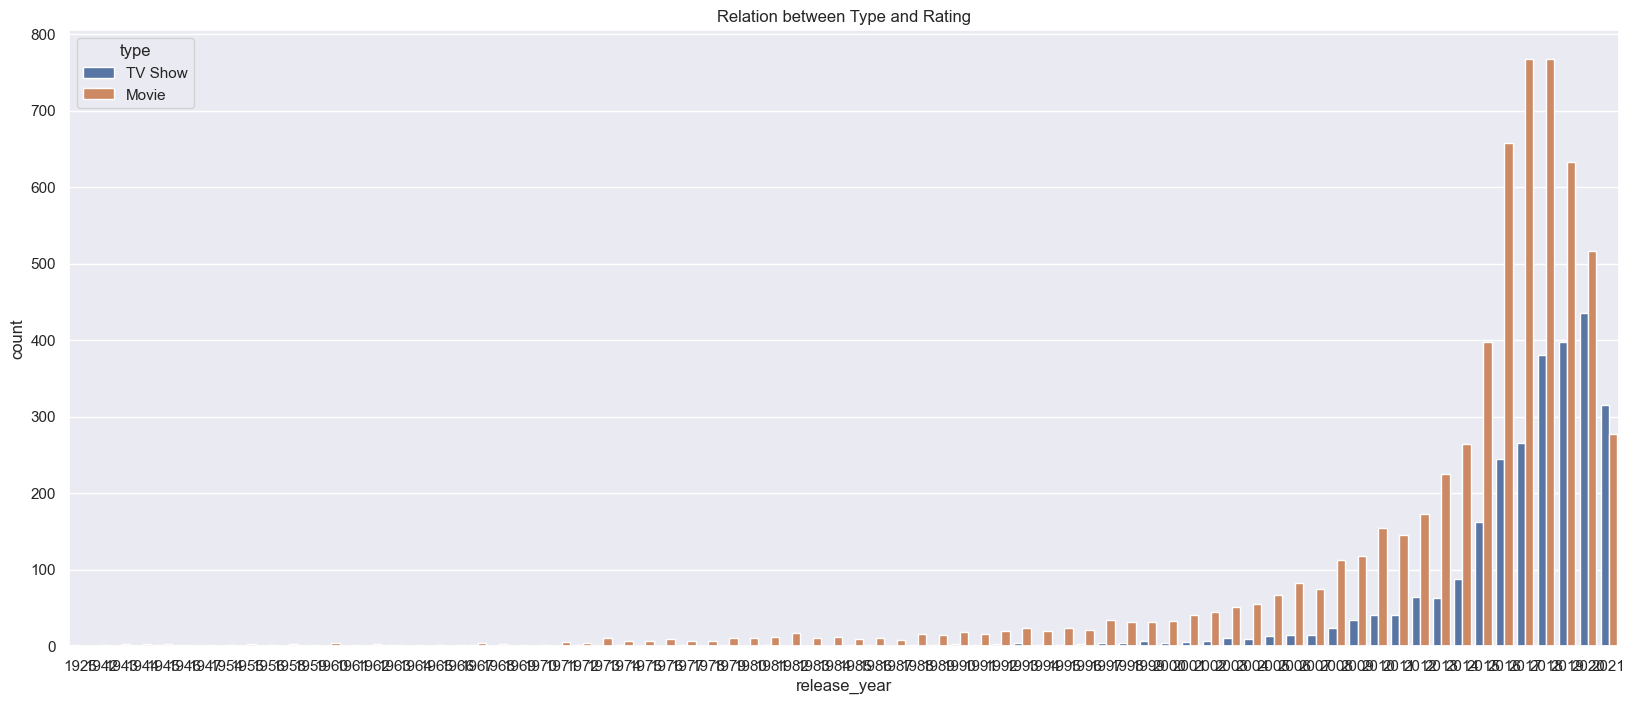

In [137]:
plt.figure(figsize=(20,8))
sns.countplot(x='release_year',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

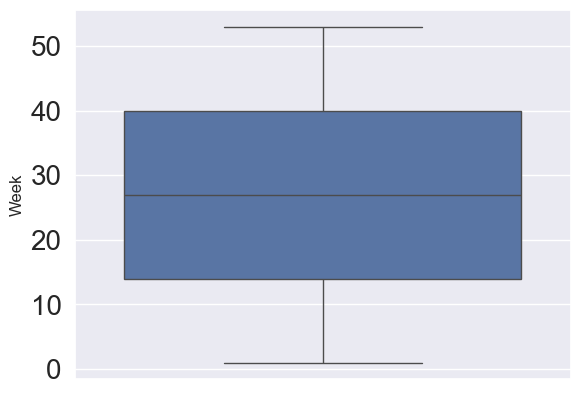

In [138]:
sns.boxplot(y = df['Week'])
plt.yticks(fontsize = 20)
plt.ylabel('Week')
plt.show()


Text(0.5, 1.0, 'Type')

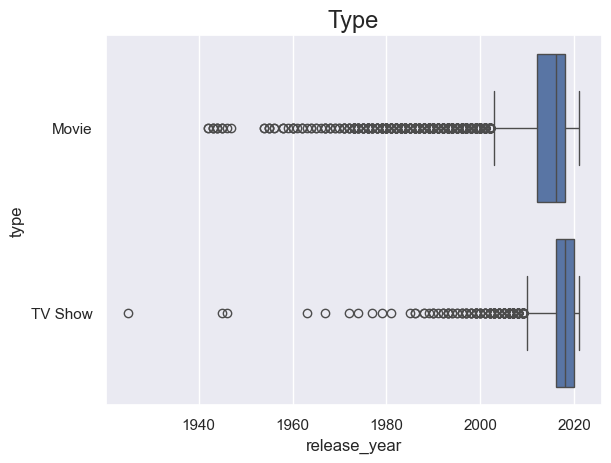

In [139]:
sns.boxplot(x=df["release_year"],y=df['type'])
plt.title("Type",fontsize=17)

Text(0.5, 1.0, 'Year Wise')

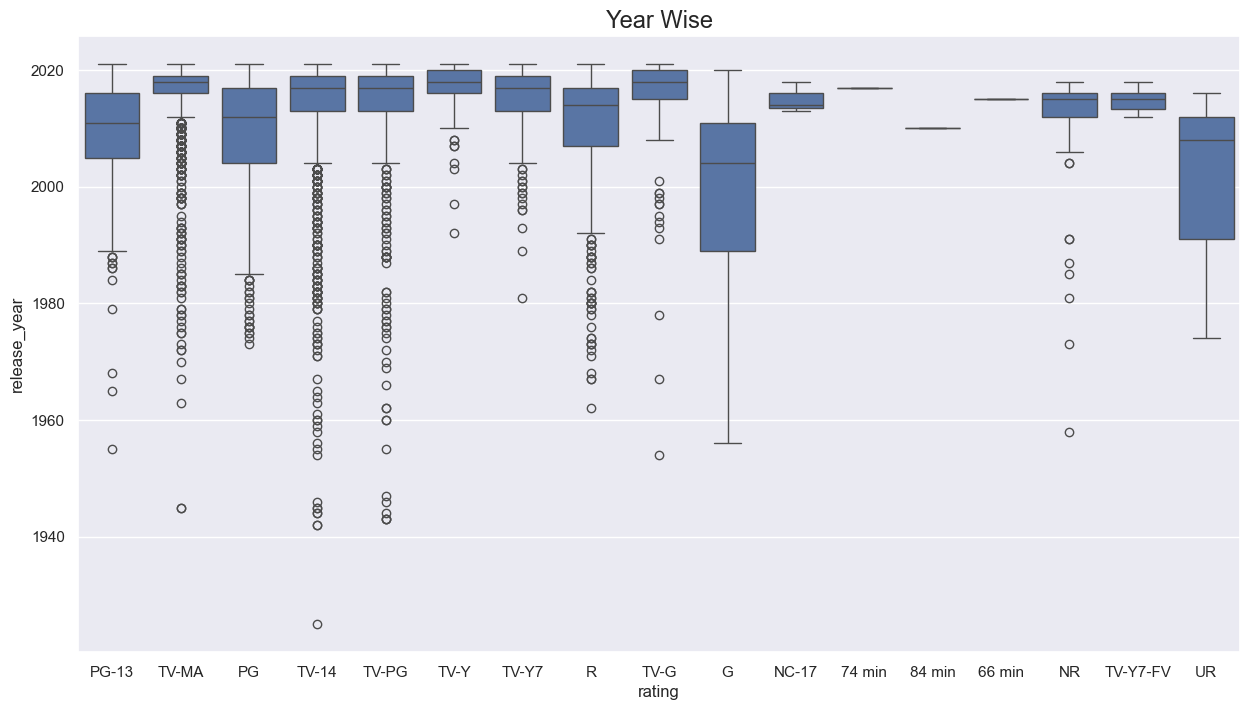

In [140]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['release_year'])
plt.title("Year Wise",fontsize=17)

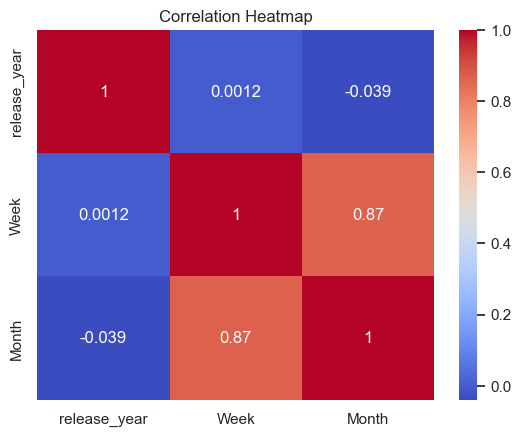

In [148]:

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Plot heatmap
sns.set_theme()
hp = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
